## 1121 Machine Learning HW1 房價預測 

### 通訊三 110503518 李秉宸

### Outline

本次使用Linear Regression方法以及已知的dataframe完成房價預測作業，利用修改train_test_split內的hyperparameters找出最佳的r2_score。我利用for loop改變test_size以及random_state的值，並找出最佳結果為test_size = 0.01, random_state = 73時，r2_score有最佳值0.951800772351036
<hr>

### Method

#### Step 1. Import modules
引入需要使用到的model，在此使用pandas, numpy, matplotlib, seaborn

In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<hr>

#### Step 2. Import and Observing dataset
df (dataframe)為資料檔(dataset)，在此直接使用公開網址讀取資料，亦可將檔案存於電腦內部資料夾，並使用其路徑作為資料來<br>

以下為關於df.head()的一些用法
```python
df.head()      #()內未設定，則預設為前5筆資料(在此範例中為0~4，共5筆)
df.head(int n) #代表顯示前n筆資料，如下
df.head(10)    #代表前10筆資料，此步驟不影響後續學習過程，僅顯示已知資料內容
```


In [2]:
#import dataset
df = pd.read_csv("https://raw.githubusercontent.com/ryanchung403/dataset/main/Housing_Dataset_Sample.csv")

#observing dataset
df.head() #default (no variable) is the top 5 data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


<hr>

#### Step 3. Get the data X and y

從dataset中取出X和y，X表示「所有可能影響預測結果的變因(all possible influence variables)」，y表示「預測目標值(the target)」<br>

以下為關於此部分語法的說明
```python
#.iloc可取出特定資料範圍，其變數設定如下
df.iloc[row_start : row_end, col_start : col_end]

#start代表開始的行或列，未設定代表0(最開頭)
#end代表結束的行或列；若未設定代表最後
#注意：讀取範圍為start至end-1筆資料，不包含end自己
```

In [3]:
X = df.iloc[:,:5]  #X gets all rows (0~4999) and 5 columns (0~4)
y = df.iloc[:,5:6] #y gets all rows (0~4999) and 1 columns (5), the 5th column is 'Price'
# y = df['Price']  #y only gets the data from the column which name is 'Price'

In [153]:
X #Show the result of X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [154]:
y #Show the result of y

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05
...,...
4995,1.060194e+06
4996,1.482618e+06
4997,1.030730e+06
4998,1.198657e+06


<hr>

#### Step 4. Split the data into training dataset and testing dataset

```python
#train_test_split()可從資料中隨機分出特定訓練(training)與測試(testing)資料
sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
```

test_size及train_size分別代表要從資料長度中區分多少比例(float (0, 1])或數量(int 1~length)作為testing data與training data；若皆未設定，則預設test_size為0.25<br>

random_state為種子碼(seed)，每個數字代表一種隨機方法，**相同random_state可使每次產生的結果相同；若未設定該parameter，則每次預測結果將會不同**

以下範例僅**改變test_size (0.2~0.3)及random_state (1~99)兩個hyperparameters**

<hr>

#### Step 5. Find the best forecast result

此處使用double for loop，每次以0.01改變test_size以及每次以1改變random_state兩變數，共計產生990筆預測結果，詳細結果見最下方。<br>
使用LinearRegression, Ridge, Lasso等三種model，帶入X_train與y_train完成預測模型，接著將X_test帶入完成之model並預測房價(preditions)，最後將實際房價(Y_test)與預測結果(preditions)對比得到r2_socre，越高分代表預測模型越精準，讚！

##### Linear Regression

課堂範例模型，使用線性迴歸將已知資料丟入訓練，並得出一套公式以預測未知資料之結果

In [9]:
#Linear Regression

#import some useful function
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

#initialize the best case
best = 0
best_i = 1
best_j = 0

for i in range(20, 31, 1):
    for j in range(0, 100, 1):

        #split to training data & testing data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100, random_state=j)

        #use linear regression model
        reg = LinearRegression()
        reg.fit(X_train, y_train)

        #get the result
        predictions = reg.predict(X_test)
        
        #caculate the r2_score of the actual value and predicions
        #if we find a better case, update the best case and record the test_size and random_state
        if r2_score(y_test, predictions) > best:
            best = r2_score(y_test, predictions)
            best_i = i/100
            best_j = j

print('In Linear Regression, the best case is test_size=', best_i , ', random_state=' , best_j , ', r2_score=' , best)

In Linear Regression, the best case is test_size= 0.2 , random_state= 76 , r2_score= 0.9277721466594443


##### Ridge

利用Linear Regression的基礎，在訓練過程加入懲罰項(penalty term)，避免出現overfitting的情況。但Ridge只會將不具影響力的變數之迴歸係數變成趨近於0(不等於0)，因此訓練後的模型仍會存在一些不重要的參數，進而影響其正確性。

In [10]:
#Ridge

#import some useful function
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

#initialize the best case
best = 0
best_i = 1
best_j = 0

for i in range(20, 31, 1):
    for j in range(0, 100, 1):

        #split to training data & testing data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100, random_state=j)

        #use linear regression model
        reg = Ridge(alpha=0.01)
        reg.fit(X_train, y_train)

        #get the result
        predictions = reg.predict(X_test)
        
        #caculate the r2_score of the actual value and predicions
        #if we find a better case, update the best case and record the test_size and random_state
        if r2_score(y_test, predictions) > best:
            best = r2_score(y_test, predictions)
            best_i = i/100
            best_j = j

print('In Ridge Regression, the best case is test_size=', best_i , ', random_state=' , best_j , ', r2_score=' , best)

In Ridge Regression, the best case is test_size= 0.2 , random_state= 76 , r2_score= 0.9277721457497979


##### Lasso

與Ridge類似，一樣利用Linear Regression的基礎，在訓練過程加入懲罰項(penalty term)，避免出現overfitting的情況。但Lasso會將不具影響力的變數之迴歸係數變成0，也就是可自動進行Feature selection，訓練後的模型正確性較高，但推廣性降低。

In [22]:
#Lasso

#import some useful function
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso

#initialize the best case
best = 0
best_i = 1
best_j = 0

for i in range(20, 31, 1):
    for j in range(0, 100, 1):

        #split to training data & testing data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100, random_state=j)

        #use linear regression model
        reg = Lasso(alpha=0.01)
        reg.fit(X_train, y_train)

        #get the result
        predictions = reg.predict(X_test)
        
        #caculate the r2_score of the actual value and predicions
        #if we find a better case, update the best case and record the test_size and random_state
        if r2_score(y_test, predictions) > best:
            best = r2_score(y_test, predictions)
            best_i = i/100
            best_j = j

print('In Lasso Regression, the best case is test_size=', best_i , ', random_state=' , best_j , ', r2_score=' , best)

In Lasso Regression, the best case is test_size= 0.2 , random_state= 76 , r2_score= 0.9277721466146726


<hr>

### Result

分析結果如下，我將每個model與其中最佳的r2_socre作圖，可發現三種模型的結果得分皆為0.927左右，與原始0.921相比有所成長，推測主要原因是因為test_size由原本的0.3調整為0.2所導致(testing data變多，擬合更為準確，可見下表)，四種模型皆符合課堂所提Regression模型的題目要求，而結果也顯示彼此差異不大。<br>

註：根據講義，SGDRegression其適用在Sample樣本數大於100K的情況下使用，在本例子中，樣本數僅有5K，故不適用於本方法。

|     | test_size  | random_state | r2_score |
|:----:|:----:|:----:|:----:|
|**原結果**| 0.3 | 54 | 0.9216604865707106 |
|**Linear**| 0.2 | 76 | 0.9277721466594443 |
|**Ridge**| 0.2 | 76 | 0.9277721457497979 |
|**Lasso**| 0.2 | 76 | 0.9277721466146726 |

由下表可知，三種模型的r2_score數據與趨勢幾乎相同，當test_size越大(train_size越小)，不論任何模型，整體r2_socre都越低，也就是當**training set越大，具備越多資料提供模型訓練，其模型準確度越高**。

| test_size | Linear      | Ridge       | Lasso       |
|:---------:|:-----------:|:-----------:|:-----------:|
| **0.20**  | 0.927772147 | 0.927772146 | 0.927772147 |
| **0.21**  | 0.926749813 | 0.926749819 | 0.926749813 |
| **0.22**  | 0.926028731 | 0.926028719 | 0.926028730 |
| **0.23**  | 0.926073904 | 0.926073936 | 0.926073904 |
| **0.24**  | 0.926211045 | 0.926211050 | 0.926211045 |
| **0.25**  | 0.926143597 | 0.926143602 | 0.926143597 |
| **0.26**  | 0.924961053 | 0.924961091 | 0.924961053 |
| **0.27**  | 0.925434878 | 0.925434904 | 0.925434878 |
| **0.28**  | 0.925118626 | 0.925118647 | 0.925118626 |
| **0.29**  | 0.924577102 | 0.924577112 | 0.924577103 |
| **0.30**  | 0.924652060 | 0.924652072 | 0.924652060 |

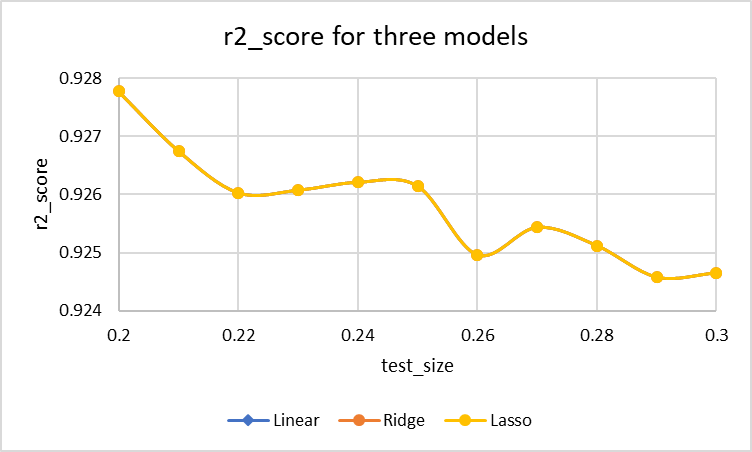

<hr>

#### Reference
[1] https://roger010620.medium.com/linear-regression-lasso-ridge%E4%BB%8B%E7%B4%B9-%E9%99%84python-code-76e89af4dce9